# OpenABM-Covid19 - Example Lockdown

This examples show how to run a simulation on 50k people and turn on a lockdown after 30 days. First we get the model with baseline parameters but change the population to 50k.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from COVID19.model import Model as abm

model = abm( params = { "n_total" : 50000 })

Now we run for 30 days.

In [2]:
for t in range(30) :
    model.one_time_step()

Now we turn on a lockdown where the number of interactions on the occupation networks and random network are cut to 10% of their pre-lockdown level and the strength of household transmissions is 1.5 times the pre-lockdown level. And run for another 10 days.

In [3]:
model.update_running_params("lockdown_occupation_multiplier_primary_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_secondary_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_working_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_retired_network", 0.1)
model.update_running_params("lockdown_occupation_multiplier_elderly_network", 0.1)
model.update_running_params("lockdown_random_network_multiplier", 0.1)
model.update_running_params("lockdown_house_interaction_multiplier", 1.5)
model.update_running_params("lockdown_on", 1)
for t in range(10) :
    model.one_time_step()

Turn the lockdown off and run for another 10 days.

In [4]:
model.update_running_params("lockdown_on", 0)
for t in range(10) :
    model.one_time_step()

Plot the instaneous R and the 5-95% confidence interval over the course of the simulation.

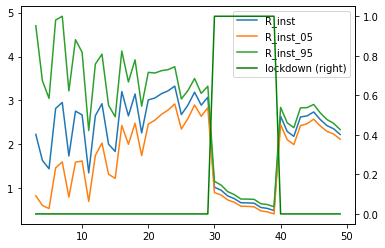

In [5]:
timeseries = model.results 
timeseries = timeseries[ timeseries.R_inst != -1 ]
plt.figure()
timeseries.R_inst.plot( x = "time", legend = True )
timeseries.R_inst_05.plot( x = "time", legend = True )
timeseries.R_inst_95.plot( x = "time", legend = True )
timeseries.lockdown.plot( x = "time", legend = True, secondary_y = True, style = 'g' )